<a href="https://colab.research.google.com/github/mayrf/pkasolver/blob/main/notebooks/pka_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculate microstate pKa values

Code and more documentation at:
https://github.com/mayrf/pkasolver

In [ ]:
# @title Initializing Condacolab
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:31
🔁 Restarting kernel...


In [ ]:
# @title Check that everything is fine

import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


In [ ]:
# @title Installing dependencies and pkasolver package (this might take up to 5 minutes)

print('📦 Installing dependencies ...')
!mamba install -c conda-forge rdkit > /dev/null
print('🔥 Installing PyTorch and PyG ...')
!pip install torch==1.9.1+cpu -f https://download.pytorch.org/whl/cpu/torch_stable.html > /dev/null
!pip install torch-scatter -f https://data.pyg.org/whl/torch-1.9.1+cpu.html > /dev/null
!pip install torch-sparse -f https://data.pyg.org/whl/torch-1.9.1+cpu.html > /dev/null
!pip install torch-spline-conv torch-geometric==2.0.1 -f https://data.pyg.org/whl/torch-1.9.1+cpu.html > /dev/null
!pip install cairosvg svgutils molvs > /dev/null
print('✔️ Installing pkasolver package ...')
!pip install -q git+https://github.com/mayrf/pkasolver.git > /dev/null
print("🎉 Done!")

📦 Installing dependencies ...
🔥 Installing PyTorch and PyG ...
✔️ Installing pkasolver package ...
🎉 Done!


🔮 Predicting...


[query.py:297 - calculate_microstate_pka_values()] Using dimorphite-dl to identify protonation sites.


Proposed mol at pH 7.4: CC(Cc1ccccc1)NC(=O)C([NH3+])CCCC[NH3+]
📸 Visualizing ...


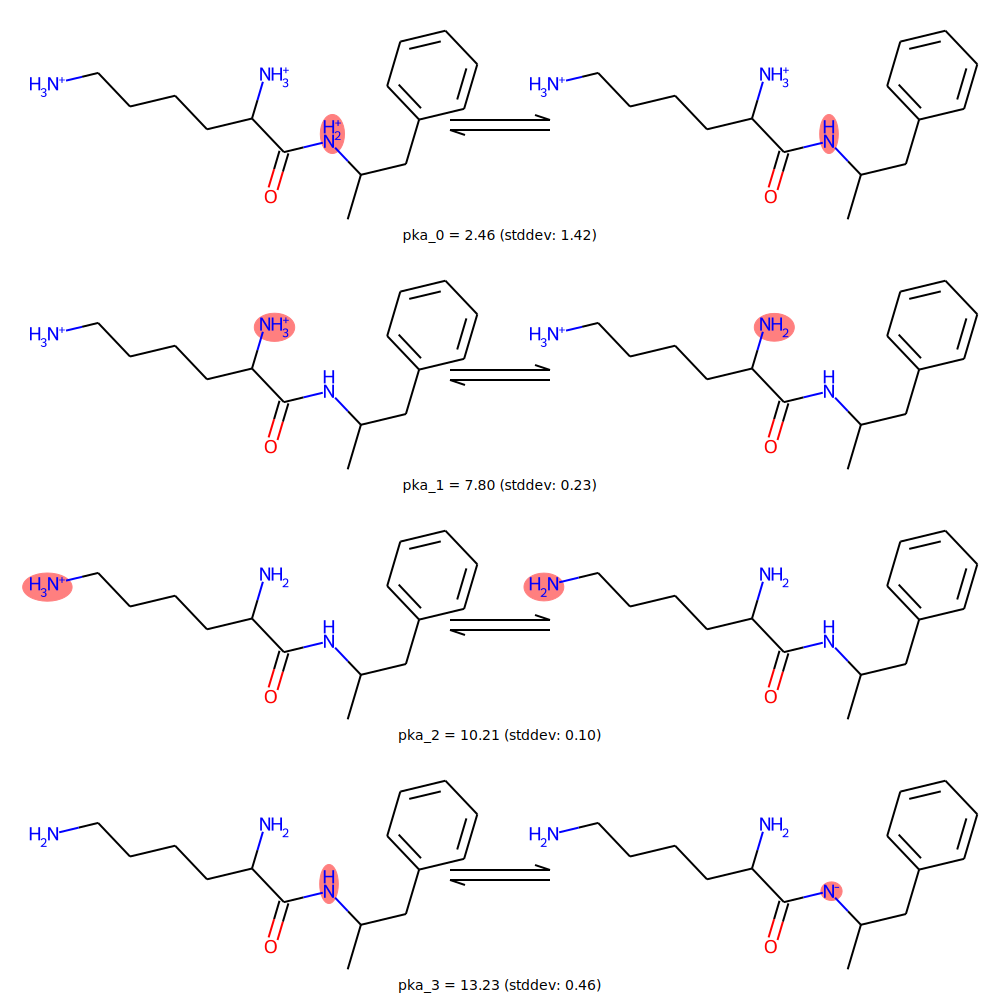

In [ ]:
# @title Predict pKa values
from pkasolver.query import QueryModel
from pkasolver.ml_architecture import GINPairV1
import pickle 
import pkasolver
import torch
from os import path
from rdkit import Chem
from pkasolver.query import calculate_microstate_pka_values, draw_pka_reactions
from IPython.display import display

# load trained model
base_path = path.dirname(pkasolver.__file__)
# get input
print("🔮 Predicting...")
smiles = "CC(CC1=CC=CC=C1)NC(=O)C(CCCCN)N"  # @param {type:"string"}
# convert from Smiles to rdkit mol
mol = Chem.MolFromSmiles(smiles)
################################################
################################################
# calculate microstate pka values
protonation_states = calculate_microstate_pka_values(mol, only_dimorphite=False)
################################################
print("📸 Visualizing ...")
# draw the micostate pka values
calc = draw_pka_reactions(protonation_states)
display(calc)

In [ ]:
# @title Report SMILE list with pKa values

print("😀################################😀")
for i in range(len(protonation_states)):
    state = protonation_states[i]
    print(
        Chem.MolToSmiles(state.protonated_mol),
        Chem.MolToSmiles(state.deprotonated_mol),
    )
    print(state.pka)
print("😀################################😀")


😀################################😀
CC(Cc1ccccc1)[NH2+]C(=O)C([NH3+])CCCC[NH3+] CC(Cc1ccccc1)NC(=O)C([NH3+])CCCC[NH3+]
2.461258141994476
CC(Cc1ccccc1)NC(=O)C([NH3+])CCCC[NH3+] CC(Cc1ccccc1)NC(=O)C(N)CCCC[NH3+]
7.804567699432373
CC(Cc1ccccc1)NC(=O)C(N)CCCC[NH3+] CC(Cc1ccccc1)NC(=O)C(N)CCCCN
10.212386016845704
CC(Cc1ccccc1)NC(=O)C(N)CCCCN CC(Cc1ccccc1)[N-]C(=O)C(N)CCCCN
13.233402290344237
😀################################😀
